# Data eda

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,order_id,create_time,good_id,price,utm_medium,utm_source,sessionkey_id,category_id,parent_id,root_id,model_id,is_moderated,rating_value,rating_count,description_length,goods_qty,pics_qty,model_create_time,is_callcenter
0,1269921,1975-12-26 09:30:08,9896348,753,5,8.0,123777004,139,133,124,123517,1,5.0,6.0,1204,6,2,1971-04-14 00:15:20.000,1
1,1270034,1975-12-26 10:28:57,9896348,753,1,2.0,123781654,139,133,124,123517,1,5.0,6.0,1204,6,2,1971-04-14 00:15:20.000,0
2,1268272,1975-12-25 11:24:28,9896348,753,2,3.0,123591002,139,133,124,123517,1,5.0,6.0,1204,6,2,1971-04-14 00:15:20.000,1
3,1270544,1975-12-26 14:16:06,9896348,753,1,1.0,123832302,139,133,124,123517,1,5.0,6.0,1204,6,2,1971-04-14 00:15:20.000,1
4,1270970,1975-12-26 18:21:47,9896348,753,3,56.0,123881603,139,133,124,123517,1,5.0,6.0,1204,6,2,1971-04-14 00:15:20.000,0


## Dates

In [3]:
train_df['create_time'] = pd.to_datetime(train_df['create_time'])
train_df['model_create_time'] = pd.to_datetime(train_df['model_create_time'])

In [4]:
train_df['create_time_diff'] = (train_df['model_create_time'] - train_df['create_time']).dt.days

train_df['create_time_year'] = train_df['create_time'].dt.year
train_df['create_time_hour'] = train_df['create_time'].dt.hour

train_df['model_create_time_year'] = train_df['model_create_time'].dt.year
train_df['model_create_time_hour'] = train_df['model_create_time'].dt.hour

In [5]:
train_df['weekday'] = train_df['create_time'].dt.weekday

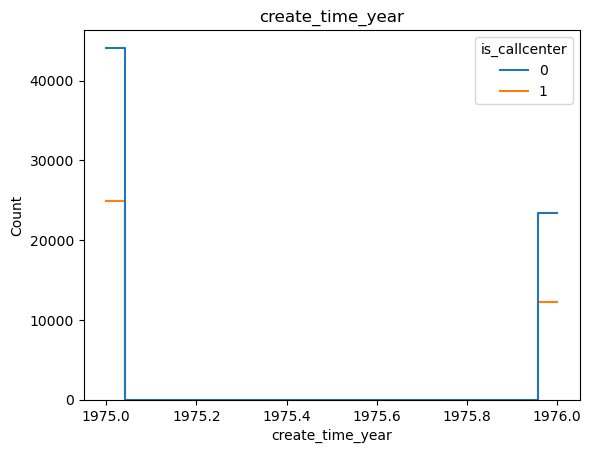

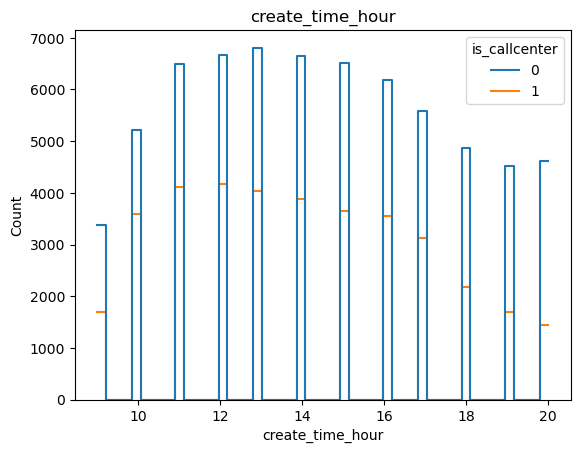

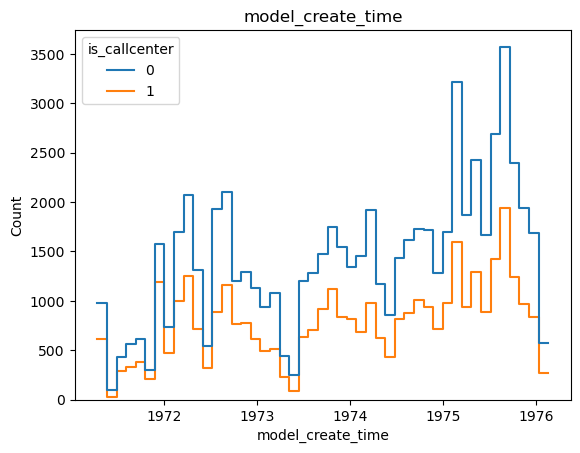

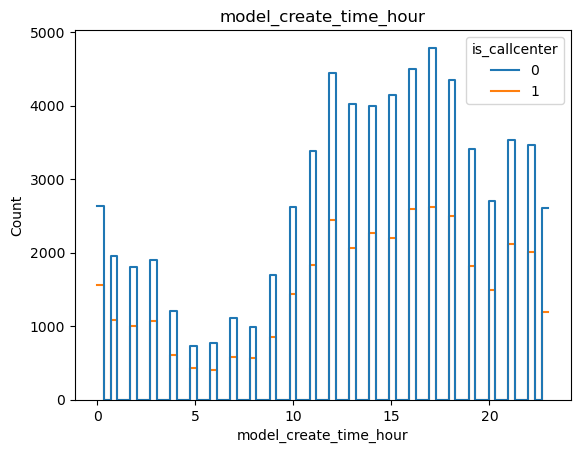

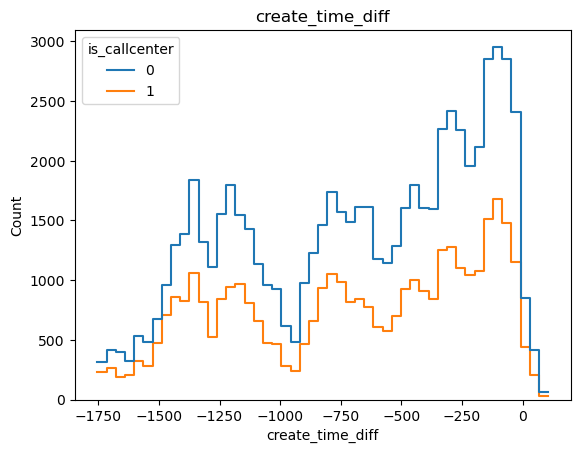

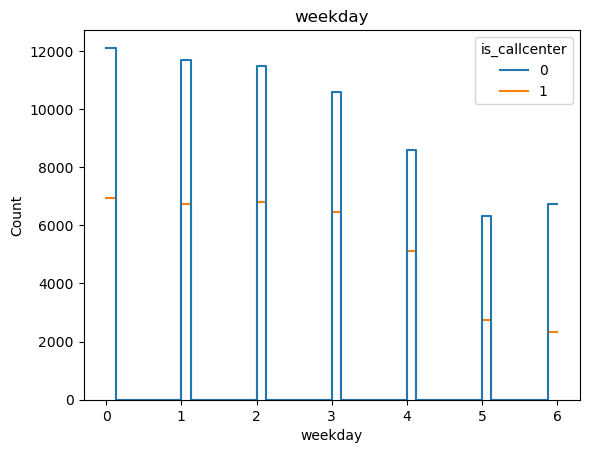

In [6]:
plt.title('create_time_year')
sns.histplot(data=train_df, x='create_time_year', hue='is_callcenter', element='step', fill=False)
plt.show()

plt.title('create_time_hour')
sns.histplot(data=train_df, x='create_time_hour', hue='is_callcenter', element='step', fill=False)
plt.show()

plt.title('model_create_time')
sns.histplot(data=train_df, x='model_create_time', hue='is_callcenter', element='step', fill=False)
plt.show()

plt.title('model_create_time_hour')
sns.histplot(data=train_df, x='model_create_time_hour', hue='is_callcenter', element='step', fill=False)
plt.show()

plt.title('create_time_diff')
sns.histplot(data=train_df, x='create_time_diff', hue='is_callcenter', element='step', fill=False)
plt.show()

plt.title('weekday')
sns.histplot(data=train_df, x='weekday', hue='is_callcenter', element='step', fill=False)
plt.show()

Независимо от дат, позвонивших примерно одинаковая доля от непозвонивиших 

## good_id

In [7]:
train_df.head()

,order_id,create_time,good_id,price,utm_medium,utm_source,sessionkey_id,category_id,parent_id,root_id,...,goods_qty,pics_qty,model_create_time,is_callcenter,create_time_diff,create_time_year,create_time_hour,model_create_time_year,model_create_time_hour,weekday
0,1269921,1975-12-26 09:30:08,9896348,753,5,8.0,123777004,139,133,124,...,6,2,1971-04-14 00:15:20,1,-1718.0,1975,9,1971.0,0.0,4
1,1270034,1975-12-26 10:28:57,9896348,753,1,2.0,123781654,139,133,124,...,6,2,1971-04-14 00:15:20,0,-1718.0,1975,10,1971.0,0.0,4
2,1268272,1975-12-25 11:24:28,9896348,753,2,3.0,123591002,139,133,124,...,6,2,1971-04-14 00:15:20,1,-1717.0,1975,11,1971.0,0.0,3
3,1270544,1975-12-26 14:16:06,9896348,753,1,1.0,123832302,139,133,124,...,6,2,1971-04-14 00:15:20,1,-1718.0,1975,14,1971.0,0.0,4
4,1270970,1975-12-26 18:21:47,9896348,753,3,56.0,123881603,139,133,124,...,6,2,1971-04-14 00:15:20,0,-1718.0,1975,18,1971.0,0.0,4


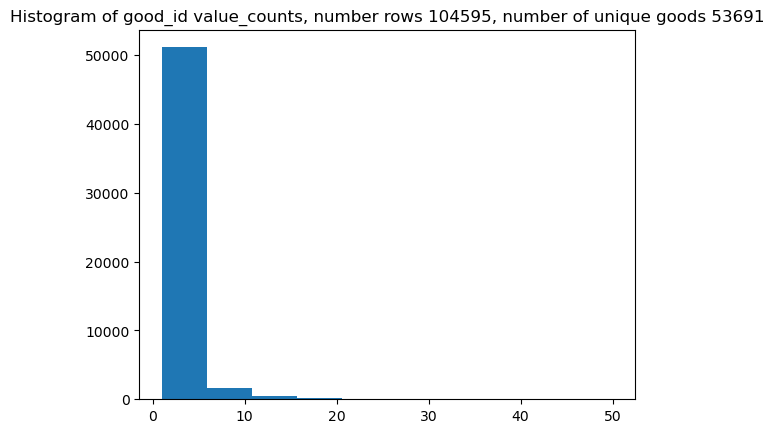

In [8]:
plt.title(
    'Histogram of good_id value_counts, ' +
    f'number rows {len(train_df)}, ' + 
    f"number of unique goods {train_df['good_id'].nunique()}"
)
plt.hist(train_df['good_id'].value_counts(), range=(1, 50))
plt.show()

## price 

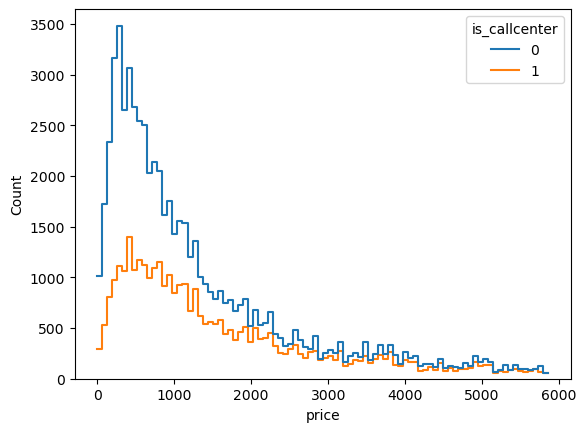

In [9]:
sns.histplot(
    data=train_df[train_df['price'] < train_df['price'].quantile(0.95)], 
    x='price', 
    hue='is_callcenter',
    element='step', 
    fill=False,
)
plt.show()

## utm_medium

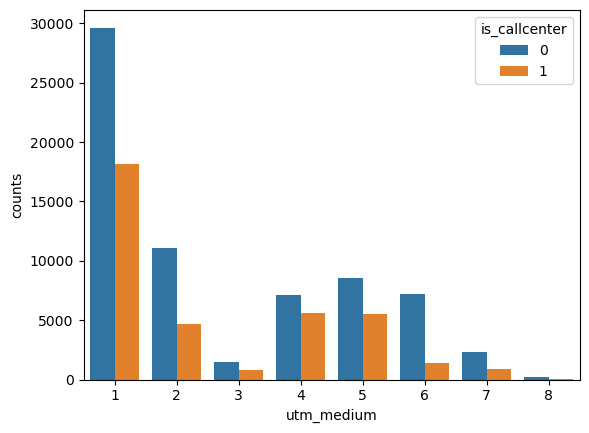

In [10]:
sns.barplot(
    train_df\
        .groupby(['utm_medium', 'is_callcenter'])\
        .size()\
        .to_frame()\
        .reset_index()\
        .rename(columns={0: 'counts'}),
    x='utm_medium',
    y='counts',
    hue='is_callcenter'
)
plt.show()


## utm_source

In [11]:
train_df['utm_source'] = train_df['utm_source'].astype(pd.Int64Dtype()).astype(str)

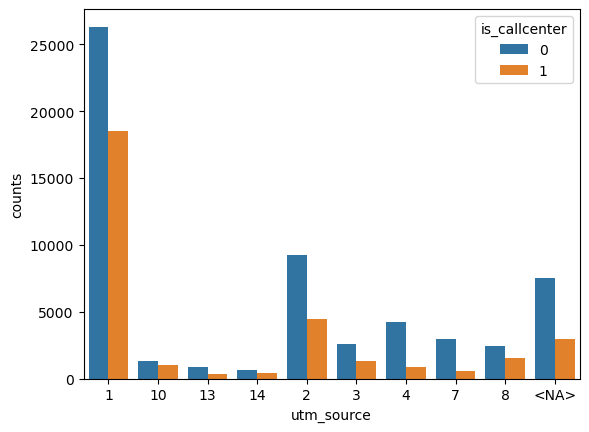

In [12]:
top_sources = train_df['utm_source'].value_counts().index[:10]
ids = train_df['utm_source'].isin(top_sources)

sns.barplot(
    train_df[ids]\
        .groupby(['utm_source', 'is_callcenter'])\
        .size()\
        .to_frame()\
        .reset_index()\
        .rename(columns={0: 'counts'}),
    x='utm_source',
    y='counts',
    hue='is_callcenter'
)
plt.show()


## sessionkey_id

In [13]:
train_df['sessionkey_id'].value_counts()

125996889    21
116065921    17
115530395    14
125861300    11
119684247    10
             ..
114311820     1
114432557     1
114365017     1
114614164     1
114672813     1
Name: sessionkey_id, Length: 96803, dtype: int64

In [14]:
train_df.groupby('sessionkey_id')['is_callcenter'].sum().max()

10

## category_id

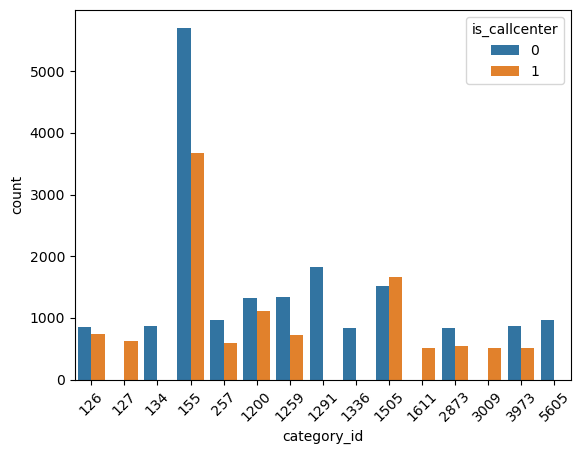

In [15]:
sns.barplot(
    data=train_df\
        .groupby(['category_id', 'is_callcenter'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'count'})\
        .query('(count > 500 & is_callcenter == 1) | (count > 800 & is_callcenter == 0)'),
    x='category_id',
    y='count',
    hue='is_callcenter'
)

plt.xticks(rotation=45)
plt.show()

## parent_id

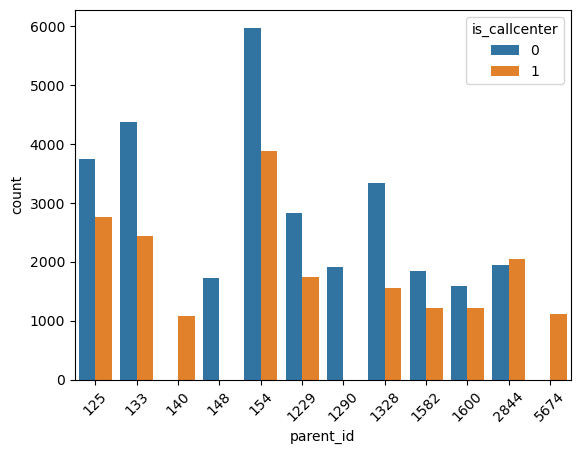

In [16]:
sns.barplot(
    data=train_df\
        .groupby(['parent_id', 'is_callcenter'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'count'})\
        .query('(count > 1000 & is_callcenter == 1) | (count > 1500 & is_callcenter == 0)'),
    x='parent_id',
    y='count',
    hue='is_callcenter',

)

plt.xticks(rotation=45)
plt.show()

## root_id

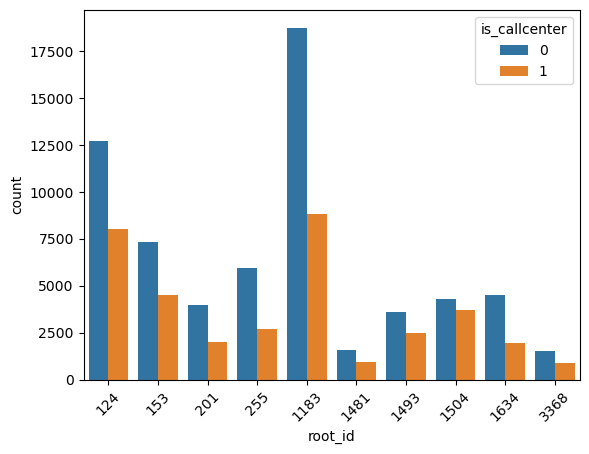

In [17]:
sns.barplot(
    data=train_df\
        .groupby(['root_id', 'is_callcenter'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'count'})\
        .query('(count > 800 & is_callcenter == 1) | (count > 1500 & is_callcenter == 0)'),
    x='root_id',
    y='count',
    hue='is_callcenter',

)

plt.xticks(rotation=45)
plt.show()

## rating_value

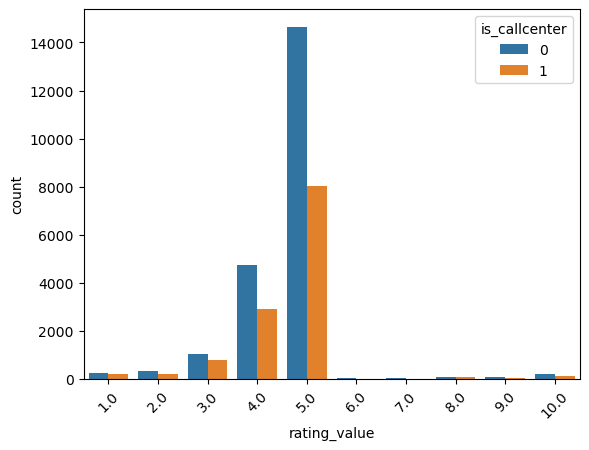

In [18]:
sns.barplot(
    data=train_df\
        .groupby(['rating_value', 'is_callcenter'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'count'}),
    x='rating_value',
    y='count',
    hue='is_callcenter',
)

plt.xticks(rotation=45)
plt.show()

## rating_count

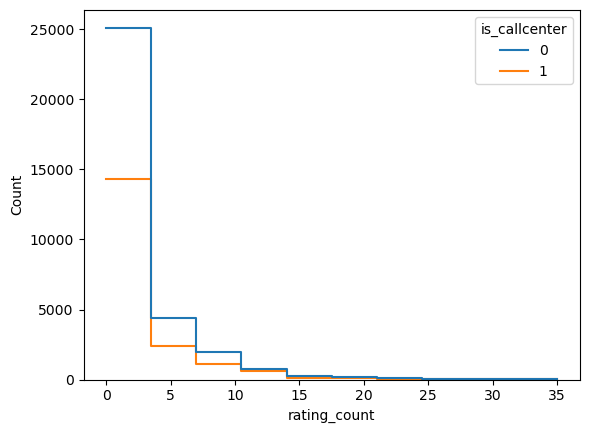

In [19]:
sns.histplot(
    data=train_df, 
    x='rating_count', 
    hue='is_callcenter', 
    element='step', 
    fill=False, 
    bins=10
)
plt.show()

## description_length

In [20]:
train_df['description_length'].replace(0, np.nan, inplace=True)

In [21]:
train_df['no_description'] = train_df['description_length'].isna()

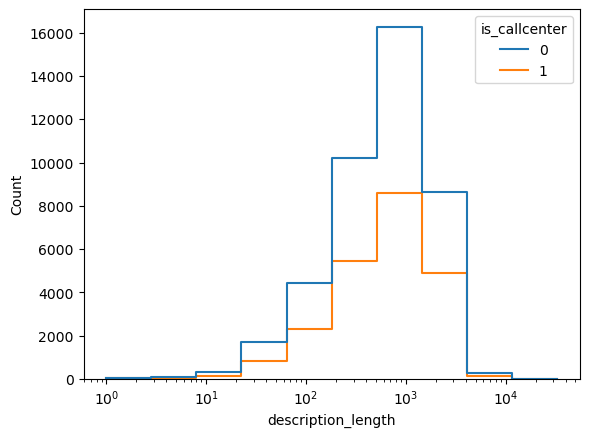

In [22]:
sns.histplot(
    data=train_df, 
    x='description_length', 
    hue='is_callcenter', 
    element='step', 
    fill=False, 
    bins=10,
    log_scale=True
)
plt.show()

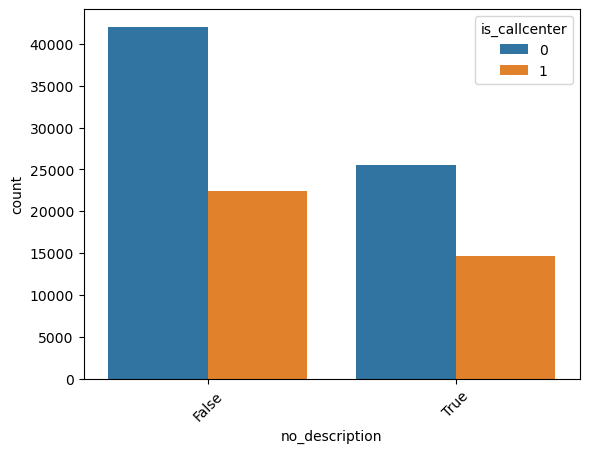

In [23]:
sns.barplot(
    data=train_df\
        .groupby(['no_description', 'is_callcenter'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'count'}),
    x='no_description',
    y='count',
    hue='is_callcenter',
)

plt.xticks(rotation=45)
plt.show()

## goods_qty

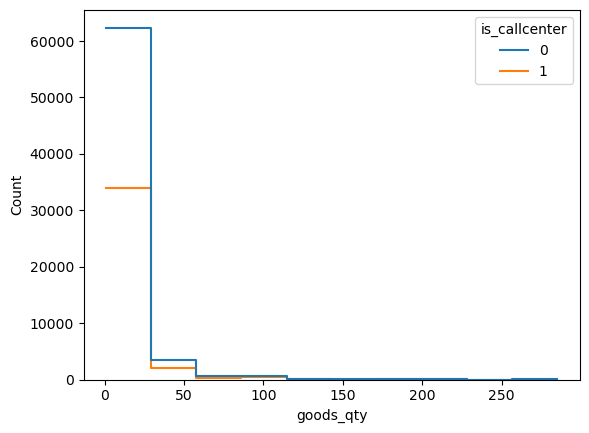

In [24]:
sns.histplot(
    data=train_df, 
    x='goods_qty', 
    hue='is_callcenter', 
    element='step', 
    fill=False, 
    bins=10,
)
plt.show()

## sessions dataframe

In [25]:
train_df.head()

,order_id,create_time,good_id,price,utm_medium,utm_source,sessionkey_id,category_id,parent_id,root_id,...,pics_qty,model_create_time,is_callcenter,create_time_diff,create_time_year,create_time_hour,model_create_time_year,model_create_time_hour,weekday,no_description
0,1269921,1975-12-26 09:30:08,9896348,753,5,8,123777004,139,133,124,...,2,1971-04-14 00:15:20,1,-1718.0,1975,9,1971.0,0.0,4,False
1,1270034,1975-12-26 10:28:57,9896348,753,1,2,123781654,139,133,124,...,2,1971-04-14 00:15:20,0,-1718.0,1975,10,1971.0,0.0,4,False
2,1268272,1975-12-25 11:24:28,9896348,753,2,3,123591002,139,133,124,...,2,1971-04-14 00:15:20,1,-1717.0,1975,11,1971.0,0.0,3,False
3,1270544,1975-12-26 14:16:06,9896348,753,1,1,123832302,139,133,124,...,2,1971-04-14 00:15:20,1,-1718.0,1975,14,1971.0,0.0,4,False
4,1270970,1975-12-26 18:21:47,9896348,753,3,56,123881603,139,133,124,...,2,1971-04-14 00:15:20,0,-1718.0,1975,18,1971.0,0.0,4,False


In [26]:
sessions_df = pd.read_csv('t1_webstat.csv')
sessions_df['date_time'] = pd.to_datetime(sessions_df['date_time'])
sessions_df.head()

,sessionkey_id,date_time,page_type,pageview_number,pageview_duration_sec,category_id,model_id,good_id,price,product_in_sale
0,122243978,1975-12-18 14:52:38.130,2,28,53.0,1773.0,NaN,NaN,NaN,NaN
1,122243978,1975-12-18 15:02:32.403,5,36,163.0,NaN,NaN,NaN,NaN,NaN
2,122243978,1975-12-18 15:08:11.147,5,40,156.0,NaN,NaN,NaN,NaN,NaN
3,122243992,1975-12-18 14:23:33.177,1,4,565.0,3973.0,26706175.0,45171119.0,8436.0,1.0
4,122243992,1975-12-18 14:32:58.763,1,5,73.0,3973.0,17297250.0,65195750.0,6624.0,1.0


In [27]:
sessions_df.groupby(['sessionkey_id', 'date_time']).size().max()

7

In [ ]:
sessions_df['date_time'] = pd.to_datetime(sessions_df['date_time'])
sessions_df['number_of_nans'] = sessions_df.isna().sum(axis=1)
# sessions_df = sessions_df.sort_values(by='number_of_nans')

sessions_df = sessions_df.add_prefix('session_').rename(columns={'session_sessionkey_id': 'sessionkey_id'})

order_session_df = train_df.merge(sessions_df, on='sessionkey_id')
order_session_df = order_session_df.query('create_time > session_date_time').copy()

order_session_df = order_session_df.merge(
    order_session_df.groupby('order_id')[['session_pageview_duration_sec']].sum()\
        .rename(columns={'session_pageview_duration_sec': 'sum_pageview_sec_before_order'}).reset_index(),
    on='order_id'
)

order_session_df['price_equals'] = (order_session_df['price'] == order_session_df['session_price'])
order_session_df['good_id_equals'] = (order_session_df['good_id'] == order_session_df['session_good_id'])

order_session_df = order_session_df.merge(
    order_session_df.groupby('order_id')[['session_date_time']].max().add_prefix('max_').reset_index(),
    on='order_id'
)

order_session_df['is_max_session_time'] = (order_session_df['session_date_time'] == order_session_df['max_session_date_time'])

order_session_df = order_session_df\
    .sort_values(by=['is_max_session_time', 'good_id_equals', 'price_equals', 'session_number_of_nans'], ascending=False)\
    .groupby('order_id').first()

order_session_df['order_session_seconds'] = (order_session_df['create_time'] - 
    order_session_df['session_date_time']).dt.total_seconds()

order_session_df['order_session_seconds'] = (order_session_df['create_time'] - 
    order_session_df['session_date_time']).dt.total_seconds()

order_session_df['order_model_session_seconds'] = (order_session_df['model_create_time'] - 
    order_session_df['session_date_time']).dt.total_seconds()


In [ ]:
session_info = sessions_df['sessionkey_id']\
        .value_counts()\
        .to_frame()\
        .reset_index()\
        .rename(columns={'index': 'sessionkey_id', 'sessionkey_id': 'sessions_count'})

session_info = session_info.merge(
    sessions_df.groupby('sessionkey_id')[['session_date_time']].max().add_prefix('max_').reset_index(),
    on='sessionkey_id',
)

session_info = session_info.merge(
    sessions_df.groupby('sessionkey_id')[['session_date_time']].min().add_prefix('min_').reset_index(),
    on='sessionkey_id',
)

session_info = session_info.merge(
    sessions_df.groupby('sessionkey_id')[['session_pageview_duration_sec']].sum().add_prefix('sum_').reset_index(),
    on='sessionkey_id',
)

session_info['session_duration'] = (session_info['max_session_date_time'] - session_info['min_session_date_time']).dt.total_seconds()

order_session_df = order_session_df.drop('max_session_date_time', axis=1).merge(
    session_info,
    on='sessionkey_id',
)

session_info.head()

In [ ]:
order_session_df.loc[order_session_df['sum_pageview_sec_before_order'] < 0, 'sum_pageview_sec_before_order'] = np.nan
order_session_df.loc[order_session_df['sum_session_pageview_duration_sec'] < 0, 'sum_session_pageview_duration_sec'] = np.nan

In [ ]:
sns.barplot(
    data=order_session_df\
        .groupby(['session_page_type', 'is_callcenter'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'counts'}),
    x='session_page_type',
    y='counts',
    hue='is_callcenter',
)

plt.show()

In [ ]:
sns.histplot(
    data=order_session_df[order_session_df['session_pageview_number'] < 100],
    x='session_pageview_number',
    hue='is_callcenter',
    bins=20,
    element='step', 
    fill=False,
)
plt.show()

In [ ]:
sns.histplot(
    data=order_session_df[order_session_df['session_pageview_duration_sec'].between(-10, 100)],
    x='session_pageview_duration_sec',
    hue='is_callcenter',
    bins=20,
    element='step', 
    fill=False,
)
plt.show()

In [ ]:
sns.barplot(
    data=order_session_df\
        .groupby(['session_number_of_nans', 'is_callcenter'])\
        .size()\
        .reset_index()\
        .rename(columns={0: 'counts'}),
    x='session_number_of_nans',
    y='counts',
    hue='is_callcenter',
)

plt.show()

Nice feature

In [ ]:
sns.histplot(
    data=order_session_df.query('order_session_seconds < 1200'),
    x='order_session_seconds',
    hue='is_callcenter',
)

plt.show()


Finally, some good feature

In [ ]:
sns.histplot(
    data=order_session_df.query('order_model_session_seconds < 1200'),
    x='order_model_session_seconds',
    hue='is_callcenter',
)

plt.show()

In [ ]:
order_session_df.columns

In [ ]:
sns.histplot(
    data=order_session_df.query('sum_pageview_sec_before_order < 4000'),
    x='sum_pageview_sec_before_order',
    hue='is_callcenter',
)

plt.show()

In [ ]:
sns.histplot(
    data=order_session_df,
    x='order_model_session_seconds',
    hue='is_callcenter',
)

plt.show()

In [ ]:
sns.histplot(
    data=order_session_df.query('sessions_count < 60'),
    x='sessions_count',
    hue='is_callcenter',
)

plt.show()

In [ ]:
sns.histplot(
    data=order_session_df.query('sum_session_pageview_duration_sec < 5000'),
    x='sum_session_pageview_duration_sec',
    hue='is_callcenter',
)

plt.show()

In [ ]:
sns.histplot(
    data=order_session_df.query('session_duration < 4000'),
    x='session_duration',
    hue='is_callcenter',
)

plt.show()

# Data engineering

In [ ]:
def engineering(order, session):
    order['create_time'] = pd.to_datetime(order['create_time'])
    order['model_create_time'] = pd.to_datetime(order['model_create_time'])

    order['create_time_diff'] = (order['model_create_time'] - order['create_time']).dt.days

    order['create_time_year'] = order['create_time'].dt.year
    order['create_time_hour'] = order['create_time'].dt.hour

    order['weekday'] = order['create_time'].dt.weekday

    order['model_create_time_year'] = order['model_create_time'].dt.year
    order['model_create_time_hour'] = order['model_create_time'].dt.hour

    order['utm_source'] = order['utm_source'].astype(pd.Int64Dtype())
    order['description_length'].replace(0, np.nan, inplace=True)
    order['no_description'] = order['description_length'].isna()

    order.loc[order['rating_value'] > 5, 'rating_value'] /= 2

    session['date_time'] = pd.to_datetime(session['date_time'])
    session['number_of_nans'] = sessions_df.isna().sum(axis=1)
    # session = sessions_df.sort_values(by='number_of_nans')
    # session.drop('number_of_nans', axis=1, inplace=True)
    # session = sessions_df.groupby(['sessionkey_id', 'date_time']).first().reset_index()

    session = session.add_prefix('session_').rename(columns={'session_sessionkey_id': 'sessionkey_id'})

    order_session = order.merge(session, on='sessionkey_id')
    order_session = order_session.query('create_time > session_date_time').copy()

    order_session = order_session.merge(
        order_session.groupby('order_id')[['session_pageview_duration_sec']].sum()\
            .rename(columns={'session_pageview_duration_sec': 'sum_pageview_sec_before_order'}).reset_index(),
        on='order_id'
    )

    order_session['price_equals'] = (order_session['price'] == order_session['session_price'])
    order_session['good_id_equals'] = (order_session['good_id'] == order_session['session_good_id'])

    order_session = order_session.merge(
        order_session.groupby('order_id')[['session_date_time']].max().add_prefix('max_').reset_index(),
        on='order_id'
    )

    order_session['is_max_session_time'] = (order_session['session_date_time'] == order_session['max_session_date_time'])
    
    order_session = order_session\
        .sort_values(by=['is_max_session_time', 'good_id_equals', 'price_equals', 'session_number_of_nans'], ascending=False)\
        .groupby('order_id').first().reset_index()

    order_session['order_session_seconds'] = (order_session['create_time'] - 
        order_session['session_date_time']).dt.total_seconds()
    
    order_session['order_model_session_seconds'] = (order_session['model_create_time'] - 
        order_session['session_date_time']).dt.total_seconds()

    session_info = session['sessionkey_id']\
        .value_counts()\
        .to_frame()\
        .reset_index()\
        .rename(columns={'index': 'sessionkey_id', 'sessionkey_id': 'sessions_count'})

    session_info = session_info.merge(
        session.groupby('sessionkey_id')[['session_date_time']].max().add_prefix('max_').reset_index(),
        on='sessionkey_id',
    )

    session_info = session_info.merge(
        session.groupby('sessionkey_id')[['session_date_time']].min().add_prefix('min_').reset_index(),
        on='sessionkey_id',
    )

    session_info = session_info.merge(
        session.groupby('sessionkey_id')[['session_pageview_duration_sec']].sum().add_prefix('sum_').reset_index(),
        on='sessionkey_id',
    )

    session_info['session_duration'] = (session_info['max_session_date_time'] - session_info['min_session_date_time']).dt.total_seconds()

    order_session = order_session.drop('max_session_date_time', axis=1).merge(
        session_info,
        on='sessionkey_id',
    )

    order = order.merge(order_session.drop(order.columns[1:], axis=1), on='order_id', how='left')

    return order

In [ ]:
train_df = pd.read_csv('train.csv')
sessions_df = pd.read_csv('t1_webstat.csv')

new_train = engineering(train_df, sessions_df)

In [ ]:
new_train.head()

# Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
new_train.columns

In [ ]:
cat_features = [
    'good_id', 
    'utm_medium', 
    'utm_source', 
    'category_id',
    'parent_id',
    'root_id',
    'model_id',
    'is_moderated',
    'create_time_hour',
    'model_create_time_hour',
    'session_page_type',
    'session_category_id',
    'session_model_id',
    'session_good_id',
    'session_product_in_sale',
    'good_id_equals',
    'price_equals',
    'session_number_of_nans',
    'rating_value', # May be move to categorical
    'no_description',
    'weekday'
]

num_features = [
    'price',
    'rating_count',
    'description_length',
    'goods_qty',
    'pics_qty',
    'create_time_diff',
    'session_pageview_number',
    'session_pageview_duration_sec',
    'session_price',
    'order_session_seconds',
    'order_model_session_seconds',
    'sum_pageview_sec_before_order',
    # 'order_model_session_seconds',
    'sessions_count',
    'sum_session_pageview_duration_sec',
    'session_duration'
]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    new_train[num_features + cat_features], 
    new_train['is_callcenter'],
    train_size=0.7,
    random_state=17,
    shuffle=True
)

# Model

In [ ]:
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score

In [ ]:
num_imputer = SimpleImputer(strategy='median')
X_train[num_features] = num_imputer.fit_transform(X_train[num_features])
X_test[num_features] = num_imputer.transform(X_test[num_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
X_train[cat_features] = cat_imputer.fit_transform(X_train[cat_features])
X_test[cat_features] = cat_imputer.transform(X_test[cat_features])

In [ ]:
X_train[cat_features] = X_train[cat_features].astype(int)
X_test[cat_features] = X_test[cat_features].astype(int)

In [ ]:
session_good_id = list(X_train.columns).index('session_good_id')
parent_id_id = list(X_train.columns).index('parent_id')

In [ ]:
model = CatBoostClassifier(
    eval_metric='AUC', 
    use_best_model=True,
    task_type="GPU",
    devices='0:1'
)

model.fit(
    X_train, 
    y_train, 
    cat_features=cat_features,
    eval_set=[(X_test, y_test)],
    verbose=False,
)

In [ ]:
y_pred = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

In [ ]:
model.best_iteration_

In [ ]:
feature_importance = model.get_feature_importance()
argsort = np.argsort(feature_importance)[::-1]
feature_importance = feature_importance[argsort]
columns = X_train.columns[argsort]

plt.bar(height=feature_importance, x=columns)
plt.xticks(rotation=90)
plt.show()

## Optuna

In [ ]:
from functools import partial
import optuna

In [ ]:
def objective_catboost_with_args(trial, X_train, y_train, X_test, y_test, cat_features):

    params = {
        'iterations': 800,
        'learning_rate': trial.suggest_float('learning_rate', 2e-4, 2e-1, log=True),
        'depth': 8,
        'task_type': 'GPU',
        'devices': '0:1',
        'cat_features': cat_features,
        'loss_function': 'Logloss'
    }

    model = CatBoostClassifier(**params)

    model.fit(
        X_train, 
        y_train, 
        cat_features=cat_features,
        verbose=False,
    )

    y_pred = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_pred)

objective_catboost = partial(
    objective_catboost_with_args, 
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test,
    y_test=y_test,
    cat_features=cat_features
)

In [ ]:
gamma = lambda n_trials: min(int(np.ceil(0.1 * n_trials)), 25)
tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=30, n_ei_candidates=24, gamma=gamma)

study = optuna.create_study(
    direction='maximize',
    sampler=tpe_sampler,
    pruner=None
)

study.optimize(
    func=objective_catboost, 
    n_trials=50,
    timeout=None,
)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
study.best_trial

In [ ]:
import dill
dill.dump_session('catboost_lr_optuned.db')

In [ ]:
import dill
dill.load_session('catboost_lr_optuned.db')

In [ ]:
def objective_catboost_with_args(trial, X_train, y_train, X_test, y_test, cat_features):

    params = {
        'iterations': trial.suggest_int('iterations', 500, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.02, 0.2),
        'depth': trial.suggest_int('depth', 5, 12),
        # 'loss_function': trial.suggest_categorical('loss_func', ['Logloss', 'CrossEntropy']),
        'l2_leaf_reg': trial.suggest_float('l2_reg', 0, 100),
        # 'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'MVS', 'Poisson', 'No']),
        # 'grow_policy': trial.suggest_categorica('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        # 'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 1000),
        'auto_class_weights': trial.suggest_categorical('class_weights', [None, 'Balanced', 'SqrtBalanced']),
        'task_type': 'GPU',
        'devices': '0:1',
        'cat_features': cat_features,
    }

    model = CatBoostClassifier(**params)

    model.fit(
        X_train, 
        y_train, 
        cat_features=cat_features,
        verbose=False,
    )

    y_pred = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_pred)

objective_catboost = partial(
    objective_catboost_with_args, 
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test,
    y_test=y_test,
    cat_features=cat_features
)

In [ ]:
gamma = lambda n_trials: min(int(np.ceil(0.1 * n_trials)), 25)
tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=30, n_ei_candidates=24, gamma=gamma)

study = optuna.create_study(
    direction='maximize',
    sampler=tpe_sampler,
    pruner=None
)

study.optimize(
    func=objective_catboost, 
    n_trials=60,
    timeout=None,
)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
# 0.9725780908743158
study.best_params

In [ ]:
dill.dump_session('catboost_first_features_optuned.db')

In [ ]:
import dill
dill.load_session('catboost_first_features_optuned.db')

In [ ]:
def objective_catboost_with_args(trial, X_train, y_train, X_test, y_test, cat_features):

    params = {
        'iterations': 700,
        'learning_rate': 0.12,
        'depth': 6,
        'loss_function': trial.suggest_categorical('loss_func', ['Logloss', 'CrossEntropy']),
        'l2_leaf_reg': 24,
        'bootstrap_type': trial.suggest_categorical('bootstrap_type', ['Bayesian', 'Bernoulli', 'Poisson', 'No']),
        'grow_policy': trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 300),
        'auto_class_weights': None,
        'task_type': 'GPU',
        'devices': '0:1',
        'cat_features': cat_features,
    }
    
    model = CatBoostClassifier(**params)

    model.fit(
        X_train, 
        y_train, 
        cat_features=cat_features,
        verbose=False,
    )

    y_pred = model.predict_proba(X_test)[:, 1]
    return roc_auc_score(y_test, y_pred)

objective_catboost = partial(
    objective_catboost_with_args, 
    X_train=X_train, 
    y_train=y_train, 
    X_test=X_test,
    y_test=y_test,
    cat_features=cat_features
)

In [ ]:
gamma = lambda n_trials: min(int(np.ceil(0.1 * n_trials)), 25)
tpe_sampler = optuna.samplers.TPESampler(n_startup_trials=30, n_ei_candidates=24, gamma=gamma)

study = optuna.create_study(
    direction='maximize',
    sampler=tpe_sampler,
    pruner=None
)

study.optimize(
    func=objective_catboost, 
    n_trials=60,
    timeout=None,
)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
study.best_params

In [ ]:
dill.dump_session('catboost_fully_optuned.db')

## Final test

In [ ]:
params = { 
    'iterations': 696,
    'learning_rate': 0.09140720655978472,
    'depth': 7,
    'l2_leaf_reg': 38.61366529620962,
    'class_weights': None,
    'task_type': 'GPU',
    'devices': '0:1',
    'cat_features': cat_features,
}

model = CatBoostClassifier(**params)
model.fit(X_train, y_train, verbose=False)
y_pred = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

In [ ]:
feature_importance = model.get_feature_importance()
argsort = np.argsort(feature_importance)[::-1]
feature_importance = feature_importance[argsort]
columns = X_train.columns[argsort]

plt.bar(height=feature_importance, x=columns)
plt.xticks(rotation=90)
plt.show()

In [ ]:
params = { 
    'iterations': 696,
    'learning_rate': 0.09140720655978472,
    'depth': 7,
    'l2_leaf_reg': 38.61366529620962,
    'class_weights': None,
    'task_type': 'GPU',
    'devices': '0:1',
    'cat_features': cat_features,
    'ignored_features': [
            'session_product_in_sale', 
            'is_moderated',
            'model_id',
        ]
}

model = CatBoostClassifier(**params)
model.fit(X_train, y_train, verbose=False)
y_pred = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

In [ ]:
feature_importance = model.get_feature_importance()
argsort = np.argsort(feature_importance)[::-1]
feature_importance = feature_importance[argsort]
columns = X_train.columns[argsort]

plt.bar(height=feature_importance, x=columns)
plt.xticks(rotation=90)
plt.show()

In [ ]:
params = {
    'iterations': 700,
    'learning_rate': 0.12,
    'depth': 6,
    'l2_leaf_reg': 24,
    'loss_function': 'CrossEntropy',
    'bootstrap_type': 'No',
    'grow_policy': 'SymmetricTree',
    'min_data_in_leaf': 238,
    'cat_features': cat_features,
}

model = CatBoostClassifier(**params)
model.fit(X_train, y_train, verbose=False)
y_pred = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

# Predict

In [ ]:
test_df = pd.read_csv('test.csv')
new_test = engineering(test_df, sessions_df)

In [ ]:
new_train_model = new_train[num_features + cat_features].copy()
y_train_model = new_train['is_callcenter']

new_test_model = new_test[num_features + cat_features].copy()

In [ ]:
num_imputer = SimpleImputer(strategy='median')
new_train_model[num_features] = num_imputer.fit_transform(new_train_model[num_features])
new_test_model[num_features] = num_imputer.transform(new_test_model[num_features])

cat_imputer = SimpleImputer(strategy='most_frequent')
new_train_model[cat_features] = cat_imputer.fit_transform(new_train_model[cat_features])
new_test_model[cat_features] = cat_imputer.transform(new_test_model[cat_features])

new_train_model[cat_features] = new_train_model[cat_features].astype(int)
new_test_model[cat_features] = new_test_model[cat_features].astype(int)

In [ ]:
params = {
    'iterations': 700,
    'learning_rate': 0.12,
    'depth': 6,
    'l2_leaf_reg': 24,
    'loss_function': 'CrossEntropy',
    'bootstrap_type': 'No',
    'grow_policy': 'SymmetricTree',
    'min_data_in_leaf': 238,
    'cat_features': cat_features,
}

model = CatBoostClassifier(**params)
model.fit(new_train_model, y_train_model, verbose=False)

In [ ]:
y_pred_test = model.predict_proba(new_test_model)[:, 1]
new_test['is_callcenter'] = y_pred_test

In [ ]:
new_test[['order_id', 'is_callcenter']].to_csv('sub2_mod.csv', index=None)